**Kaggle Data Frame Initial Visualisation**

*Import code from 'Kaggle Data Frame Initial Cleaning' before running this notebook:*

Some variables such as genres,  production company and production countries included malformatted data and contained string and list in their data type which led to certain decisions in the code.
Moreover, unless the values dropped were deeemd to be an outlier which had to be removed, code for rows taken out for a visualisation were then # in order to reduce the impact on the global data frame

Graphs were coded using the workshops from the Quantitative Methods and Mathematical Thinking 2 module (Ollie Ballinger) as well as an existing kaggle notebook analysing similar data sets: "The Story of Film" (Banik, 2018) available here: https://www.kaggle.com/code/rounakbanik/the-story-of-film 
For the more complex visualisations, edits to our code were made using ChatGPT 3.5, available here: http://chat.openai.com

In [101]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import numpy as np
import calendar
import seaborn as sns

file_name = 'tmdb_5000_movies.csv'
tmdb_5000 = pd.read_csv(file_name)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

pd.set_option('display.float_format', lambda x: '%.2f' % x)
tmdb_5000['release_date'] = pd.to_datetime(tmdb_5000['release_date'], errors='coerce')
main_columns = ['budget','genres','keywords','original_language','original_title','overview','production_companies','production_countries','spoken_languages','tagline','title','revenue','runtime','vote_average','vote_count','popularity','release_date']
tmdb_5000 = tmdb_5000.loc[:, main_columns]

In [102]:
duplicate_rows = tmdb_5000[tmdb_5000.duplicated()]
num_duplicate_rows = len(duplicate_rows)

In [103]:
tmdb_5000['budget'] = tmdb_5000['budget'].replace(0 , np.nan)
tmdb_5000['revenue'] = tmdb_5000['revenue'].replace(0 , np.nan)
tmdb_5000['runtime'] = tmdb_5000['runtime'].replace(0.00 , np.nan)
tmdb_5000['vote_average'] = tmdb_5000['vote_average'].replace(0.00 , np.nan)
tmdb_5000['vote_count'] = tmdb_5000['vote_count'].replace(0 , np.nan)
tmdb_5000['popularity'] = tmdb_5000['popularity'].replace(0.00 , np.nan)
tmdb_5000['release_date'] = tmdb_5000['release_date'].replace(0 , np.nan)

In [104]:
tmdb_5000.sort_values(by='budget', ascending=True)
tmdb_5000 = tmdb_5000[tmdb_5000['budget'] >= 7000]
tmdb_5000.sort_values(by='budget', ascending=True).head()

,budget,genres,keywords,original_language,original_title,overview,production_companies,production_countries,spoken_languages,tagline,title,revenue,runtime,vote_average,vote_count,popularity,release_date
4796,7000.00,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",What happens if it actually works?,Primer,424760.00,77.00,6.90,658.00,23.31,2004-10-08
4696,8000.00,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 237, ""name"": ""gay""}, {""id"": 1025, ""nam...",en,Weekend,After a drunken house party with his straight ...,"[{""name"": ""EM Media"", ""id"": 1917}, {""name"": ""T...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]","[{""iso_639_1"": ""en"", ""name"": ""English""}]",A (sort of) love story between two guys over a...,Weekend,469947.00,96.00,7.40,163.00,1.04,2011-09-22
4799,9000.00,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,[],[],[],A newlywed couple's honeymoon is upended by th...,Newlyweds,NaN,85.00,5.90,5.00,0.64,2011-12-26
4724,10000.00,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 14, ""name...","[{""id"": 1009, ""name"": ""baby""}, {""id"": 1852, ""n...",en,Eraserhead,Henry Spencer tries to survive his industrial ...,"[{""name"": ""American Film Institute (AFI)"", ""id...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Where your nightmares end...,Eraserhead,7000000.00,89.00,7.50,485.00,20.40,1977-03-19
4788,12000.00,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...","[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",An exercise in poor taste.,Pink Flamingos,6000000.00,93.00,6.20,110.00,4.55,1972-03-12


In [105]:
tmdb_5000.sort_values(by='revenue', ascending=True)
tmdb_5000 = tmdb_5000[tmdb_5000['revenue'] >= 3000]
tmdb_5000.sort_values(by='revenue', ascending=True).head() 

,budget,genres,keywords,original_language,original_title,overview,production_companies,production_countries,spoken_languages,tagline,title,revenue,runtime,vote_average,vote_count,popularity,release_date
4065,2100000.00,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...","[{""id"": 40865, ""name"": ""new york state""}, {""id...",en,Mi America,A hate-crime has been committed in a the small...,"[{""name"": ""Industrial House Films"", ""id"": 65589}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",NaN,Mi America,3330.00,126.00,NaN,NaN,0.04,2015-10-16
1999,25000000.00,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...","[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,The Adventurer: The Curse of the Midas Box,17-year-old Mariah Mundi's life is turned upsi...,"[{""name"": ""Matador Pictures"", ""id"": 707}, {""na...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",The new name for adventure.,The Adventurer: The Curse of the Midas Box,6399.00,99.00,5.10,73.00,8.84,2013-12-05
4399,1000000.00,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 14, ""name...","[{""id"": 3298, ""name"": ""hallucination""}, {""id"":...",en,Special,A lonely metermaid has a psychotic reaction to...,"[{""name"": ""Rival Pictures"", ""id"": 2830}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",NaN,Special,7202.00,81.00,6.60,32.00,1.26,2006-01-30
3121,10000000.00,"[{""id"": 35, ""name"": ""Comedy""}]",[],en,Janky Promoters,Two shady concert promoters get into hot water...,"[{""name"": ""Cube Vision"", ""id"": 2780}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",NaN,Janky Promoters,9069.00,85.00,7.00,5.00,1.73,2009-10-16
4772,31192.00,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""id"": 9826, ""name"": ""murder""}, {""id"": 10123,...",en,Down Terrace,After serving jail time for a mysterious crime...,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]","[{""iso_639_1"": ""en"", ""name"": ""English""}]",You're only as good as the people you know.,Down Terrace,10000.00,89.00,6.30,26.00,1.33,2009-09-01


In [106]:
tmdb_5000 = tmdb_5000.drop(2384, axis='index')

In [107]:
columns_to_keep = ['budget','revenue','runtime','vote_average','vote_count','popularity','release_date']
sum_stats1 = tmdb_5000.loc[:, columns_to_keep]

In [108]:
test_drop_nulls = pd.DataFrame(tmdb_5000['budget'])
test_drop_nulls = test_drop_nulls.dropna()
print(test_drop_nulls.isnull().sum())

budget    0
dtype: int64


In [109]:
test_drop_nulls
test_drop_nulls2 = pd.concat([test_drop_nulls], ignore_index=True)
test_drop_nulls2.head()

,budget
0,237000000.00
1,300000000.00
2,245000000.00
3,250000000.00
4,260000000.00


**Budget Variable:**

1 - Swarm Plot

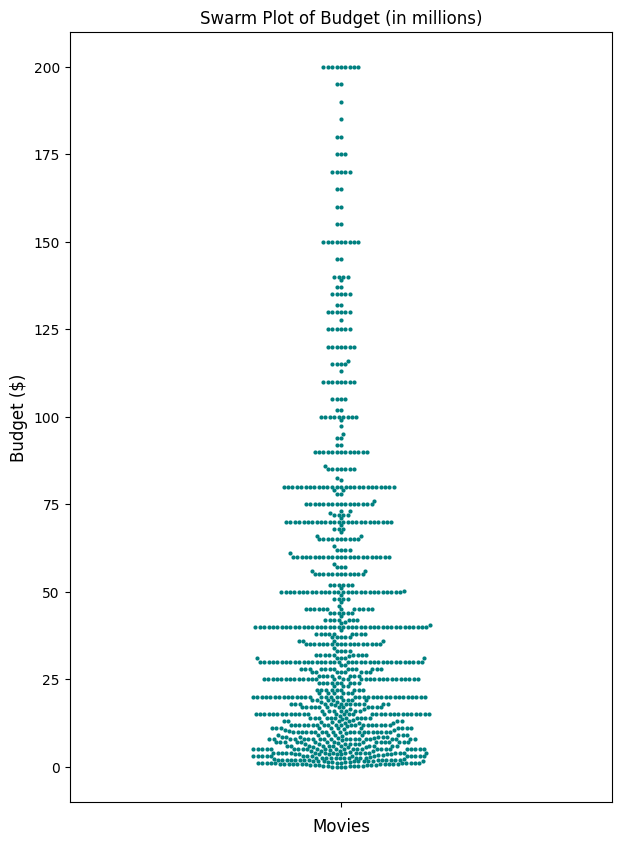

In [10]:
sample_size = 1000 
random_sample = tmdb_5000.sample(n=sample_size, random_state=42) 
random_sample['budget_million'] = random_sample['budget'] / 1e6

top_five_indices = random_sample['budget_million'].nlargest(5).index
random_sample = random_sample.drop(top_five_indices)

plt.figure(figsize=(7, 10))

sns.swarmplot(x=None, y='budget_million', data=random_sample, color='teal', size=3)
plt.title('Swarm Plot of Budget (in millions)', fontsize=12)
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Budget ($)', fontsize=12)

plt.show()

2 - Box Plot

In [211]:
tmdb_5000['budget'] = tmdb_5000['budget']/1e6

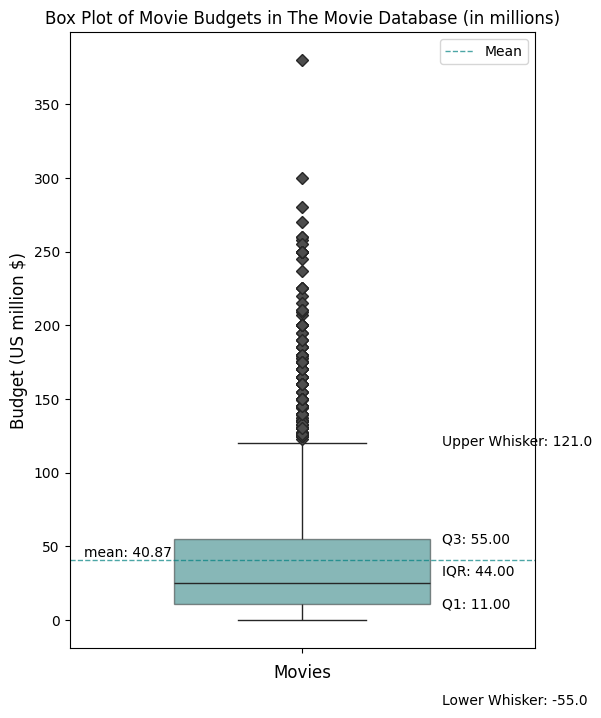

In [212]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=tmdb_5000['budget'], width=0.55, linewidth=1, color='teal', boxprops=dict(alpha=0.5), flierprops=dict(marker='D', markerfacecolor='0.3'))
plt.title('Box Plot of Movie Budgets in The Movie Database (in millions)')
plt.ylabel('Budget (US million $)', fontsize=12)
plt.xlabel('Movies', fontsize=12)

plt.axhline(y=tmdb_5000['budget'].mean(), color='teal', alpha=0.7, linestyle='--', linewidth=1, label='Mean')

Q1 = tmdb_5000['budget'].quantile(0.25)
Q3 = tmdb_5000['budget'].quantile(0.75)
IQR = Q3 - Q1
mean = tmdb_5000['budget'].mean()

plt.text(0.30, Q1, f'Q1: {Q1:.2f}', va='center', ha='left', color='black')
plt.text(0.30, Q3, f'Q3: {Q3:.2f}', va='center', ha='left', color='black')
plt.text(0.30, Q1 + 0.5 * IQR, f'IQR: {IQR:.2f}', va='center', ha='left', color='black')
plt.text(-0.47, mean,f'mean: {mean:.2f}', va='bottom', ha='left', color='black')

plt.legend()

plt.show()

In [219]:
print(f'Upper Whisker: {Q3 + 1.5 * IQR:.1f}')
print(f'Lower Whisker: {Q1 - 1.5 * IQR:.1f}')

Upper Whisker: 342.3
Lower Whisker: -177.7


In [63]:
print(tmdb_5000.iloc[17])

budget                                                           380000000.00
keywords                    [{"id": 658, "name": "sea"}, {"id": 1316, "nam...
original_language                                                          en
original_title                    Pirates of the Caribbean: On Stranger Tides
overview                    Captain Jack Sparrow crosses paths with a woma...
production_companies        [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
production_countries        [{"iso_3166_1": "US", "name": "United States o...
spoken_languages            [{"iso_639_1": "en", "name": "English"}, {"iso...
tagline                                           Live Forever Or Die Trying.
title                             Pirates of the Caribbean: On Stranger Tides
revenue                                                         1045713802.00
runtime                                                                136.00
vote_average                                                    

In [64]:
print(tmdb_5000['budget'].max())

380000000.0


3 - Histogram 

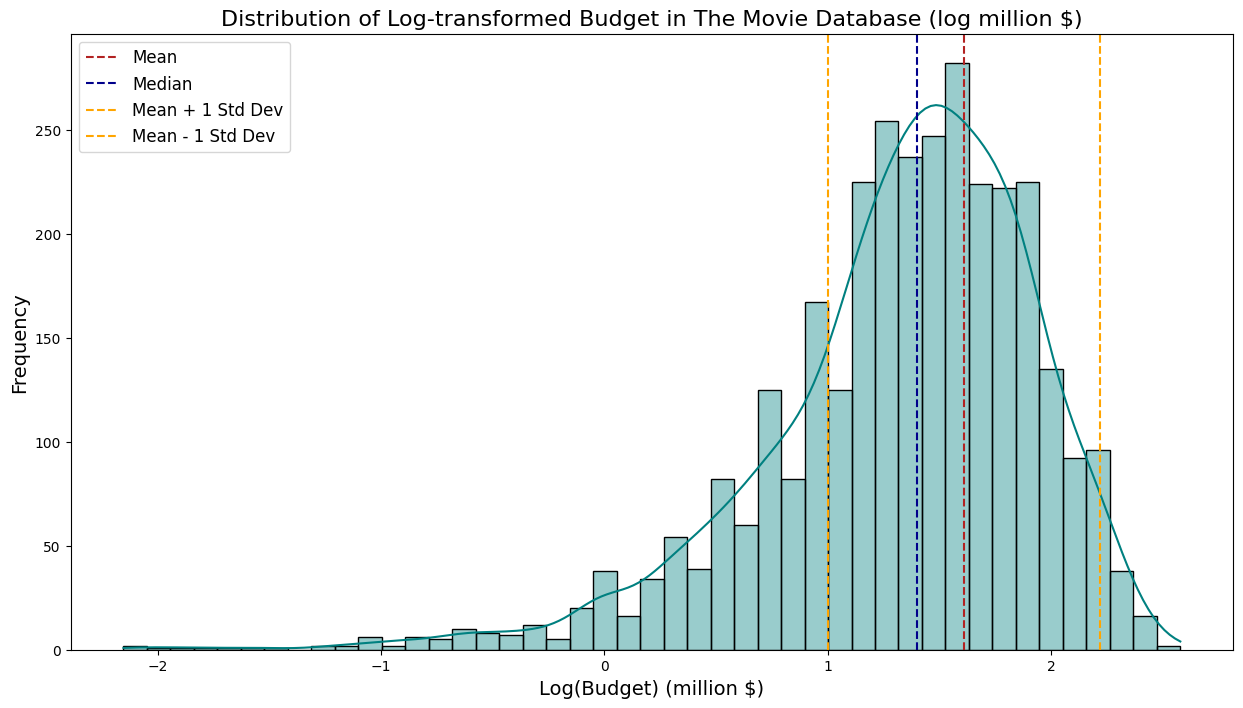

In [217]:
log_budget = np.log10(tmdb_5000['budget'])
mean = np.log10(tmdb_5000['budget'].mean())
median = np.log10(tmdb_5000['budget'].median())
std_dev = np.log10(tmdb_5000['budget']).std()

plt.figure(figsize=(15, 8))
sns.histplot(log_budget, bins=45, kde=True, color='teal', alpha=0.4)

plt.axvline(x=mean, color='firebrick', linestyle='--', label='Mean')
plt.axvline(x=median, color='darkblue', linestyle='--', label='Median')
plt.axvline(x=mean + std_dev, color='orange', linestyle='--', label='Mean + 1 Std Dev')
plt.axvline(x=mean - std_dev, color='orange', linestyle='--', label='Mean - 1 Std Dev')
plt.legend(fontsize=12)

plt.title('Distribution of Log-transformed Budget in The Movie Database (log million $)', fontsize=16)
plt.xlabel('Log(Budget) (million $)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [66]:
tmdb_5000['budget'].median()

25292500.0

In [67]:
tmdb_5000['budget'].mean()

40889246.12437656

**Revenue Variable:**

1 - Swarm Plot

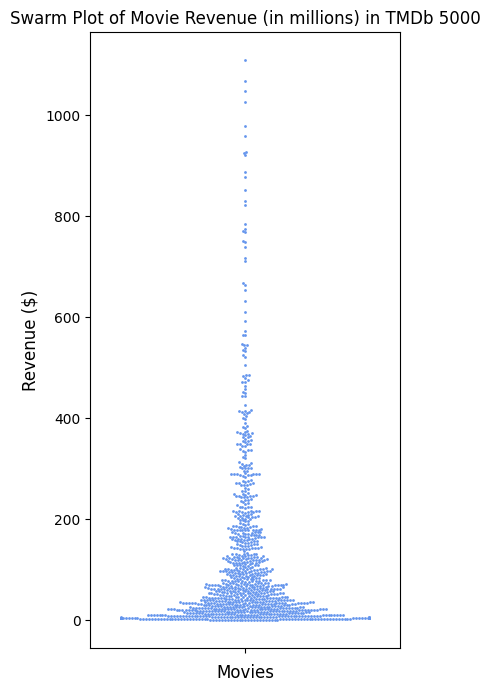

In [52]:
sample_size = 1000  
random_sample = tmdb_5000.sample(n=sample_size, random_state=42)  
random_sample['revenue_million'] = random_sample['revenue'] / 1e6 

top_8_indices = random_sample['revenue_million'].nlargest(8).index
random_sample = random_sample.drop(top_8_indices)

plt.figure(figsize=(4, 8))
sns.swarmplot(x=None, y='revenue_million', data=random_sample, color='#6495ED', size=2)
plt.title('Swarm Plot of Movie Revenue (in millions) in TMDb 5000', fontsize=12)
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.show()

2 - Box Plot 

In [215]:
tmdb_5000['revenue'] = tmdb_5000['revenue']/1e6

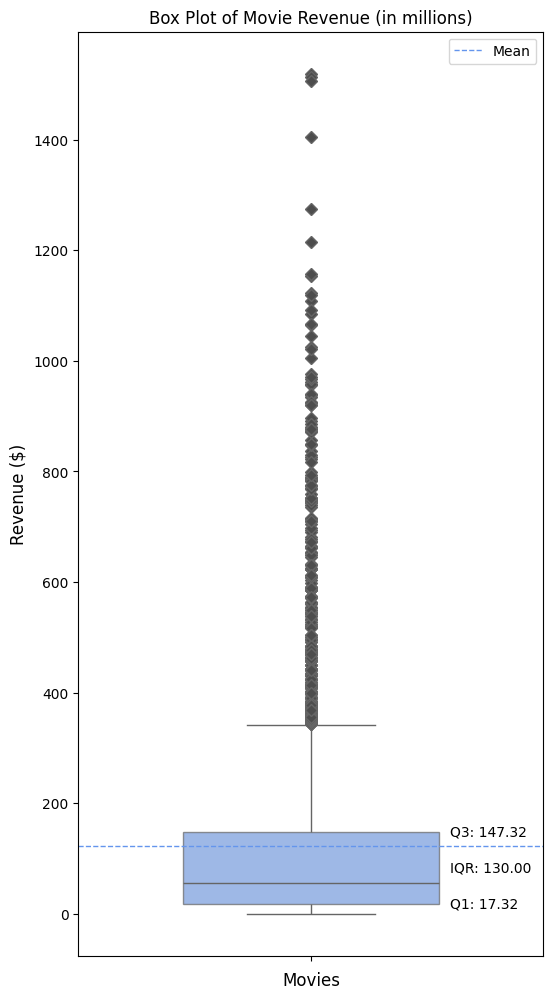

In [216]:
#taking out an outlier
slice = tmdb_5000['revenue'][1:].drop(25)

plt.figure(figsize=(6, 12))
sns.boxplot(y=slice, width=0.55, linewidth=1, color='#6495ED', boxprops=dict(alpha=0.7), flierprops=dict(marker='D', markerfacecolor='0.3'))
plt.title('Box Plot of Movie Revenue (in millions)')
plt.ylabel('Revenue ($)', fontsize=12)
plt.xlabel('Movies', fontsize=12)

plt.axhline(y=tmdb_5000['revenue'].mean(), color='#6495ED', linestyle='--', linewidth=1, label='Mean')

Q1 = tmdb_5000['revenue'].quantile(0.25)
Q3 = tmdb_5000['revenue'].quantile(0.75)
IQR = Q3 - Q1

plt.text(0.30, Q1, f'Q1: {Q1:.2f}', va='center', ha='left', color='black')
plt.text(0.30, Q3, f'Q3: {Q3:.2f}', va='center', ha='left', color='black')
plt.text(0.30, Q1 + 0.5 * IQR, f'IQR: {IQR:.2f}', va='center', ha='left', color='black')
plt.legend()

plt.show()



In [71]:
print(tmdb_5000['revenue'].median())
print(tmdb_5000['revenue'].mean())

56162787.5
122028922.25592269


In [78]:
print(tmdb_5000['revenue'].max())

2787965087.0


In [79]:
print(tmdb_5000[tmdb_5000['revenue'] == 2787965087.0])

        budget                                           keywords  \
0 237000000.00  [{"id": 1463, "name": "culture clash"}, {"id":...   

  original_language original_title  \
0                en         Avatar   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   

                                production_companies  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...   

                                production_countries  \
0  [{"iso_3166_1": "US", "name": "United States o...   

                                    spoken_languages  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...   

                       tagline   title       revenue  runtime  vote_average  \
0  Enter the World of Pandora.  Avatar 2787965087.00   162.00          7.20   

   vote_count  popularity release_date  \
0    11800.00      150.44   2009-12-10   

                                     genre_names first_genre  \
0  [Action, Adventure, F

3 - Histogram

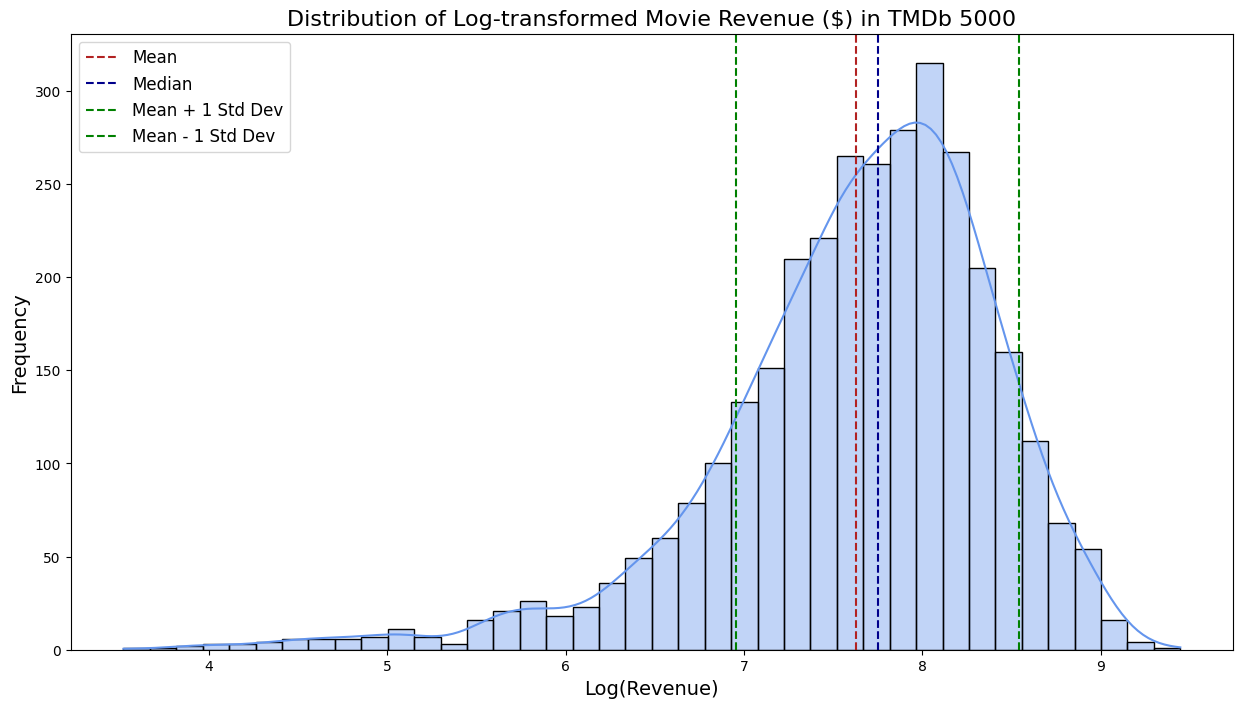

In [15]:
log_revenue = np.log10(tmdb_5000['revenue'])  

revenue_median = np.log10(tmdb_5000['revenue']).median()
revenue_std_dev = np.log10(tmdb_5000['revenue']).std()
plt.figure(figsize=(15, 8))
sns.histplot(log_revenue, bins=40, kde=True, color='#6495ED', alpha=0.4)

plt.axvline(x=log_revenue.mean(), color='firebrick', linestyle='--', label='Mean')
plt.axvline(x=log_revenue.median(), color='darkblue', linestyle='--', label='Median')
plt.axvline(x=revenue_median + revenue_std_dev, color='green', linestyle='--', label='Mean + 1 Std Dev')
plt.axvline(x=revenue_median - revenue_std_dev, color='green', linestyle='--', label='Mean - 1 Std Dev')
plt.legend(fontsize=12)

plt.title('Distribution of Log-transformed Movie Revenue ($) in TMDb 5000', fontsize=16)
plt.xlabel('Log(Revenue)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [69]:
print("Mean on the log scale:", log_revenue.mean())
print("Median on the log scale:", log_revenue.median())

Mean on the log scale: 7.6271790714215575
Median on the log scale: 7.7484117984347645


In [ ]:
print(tmdb_5000['revenue'].max())

**Budget and Revenue Scatter Plot:**

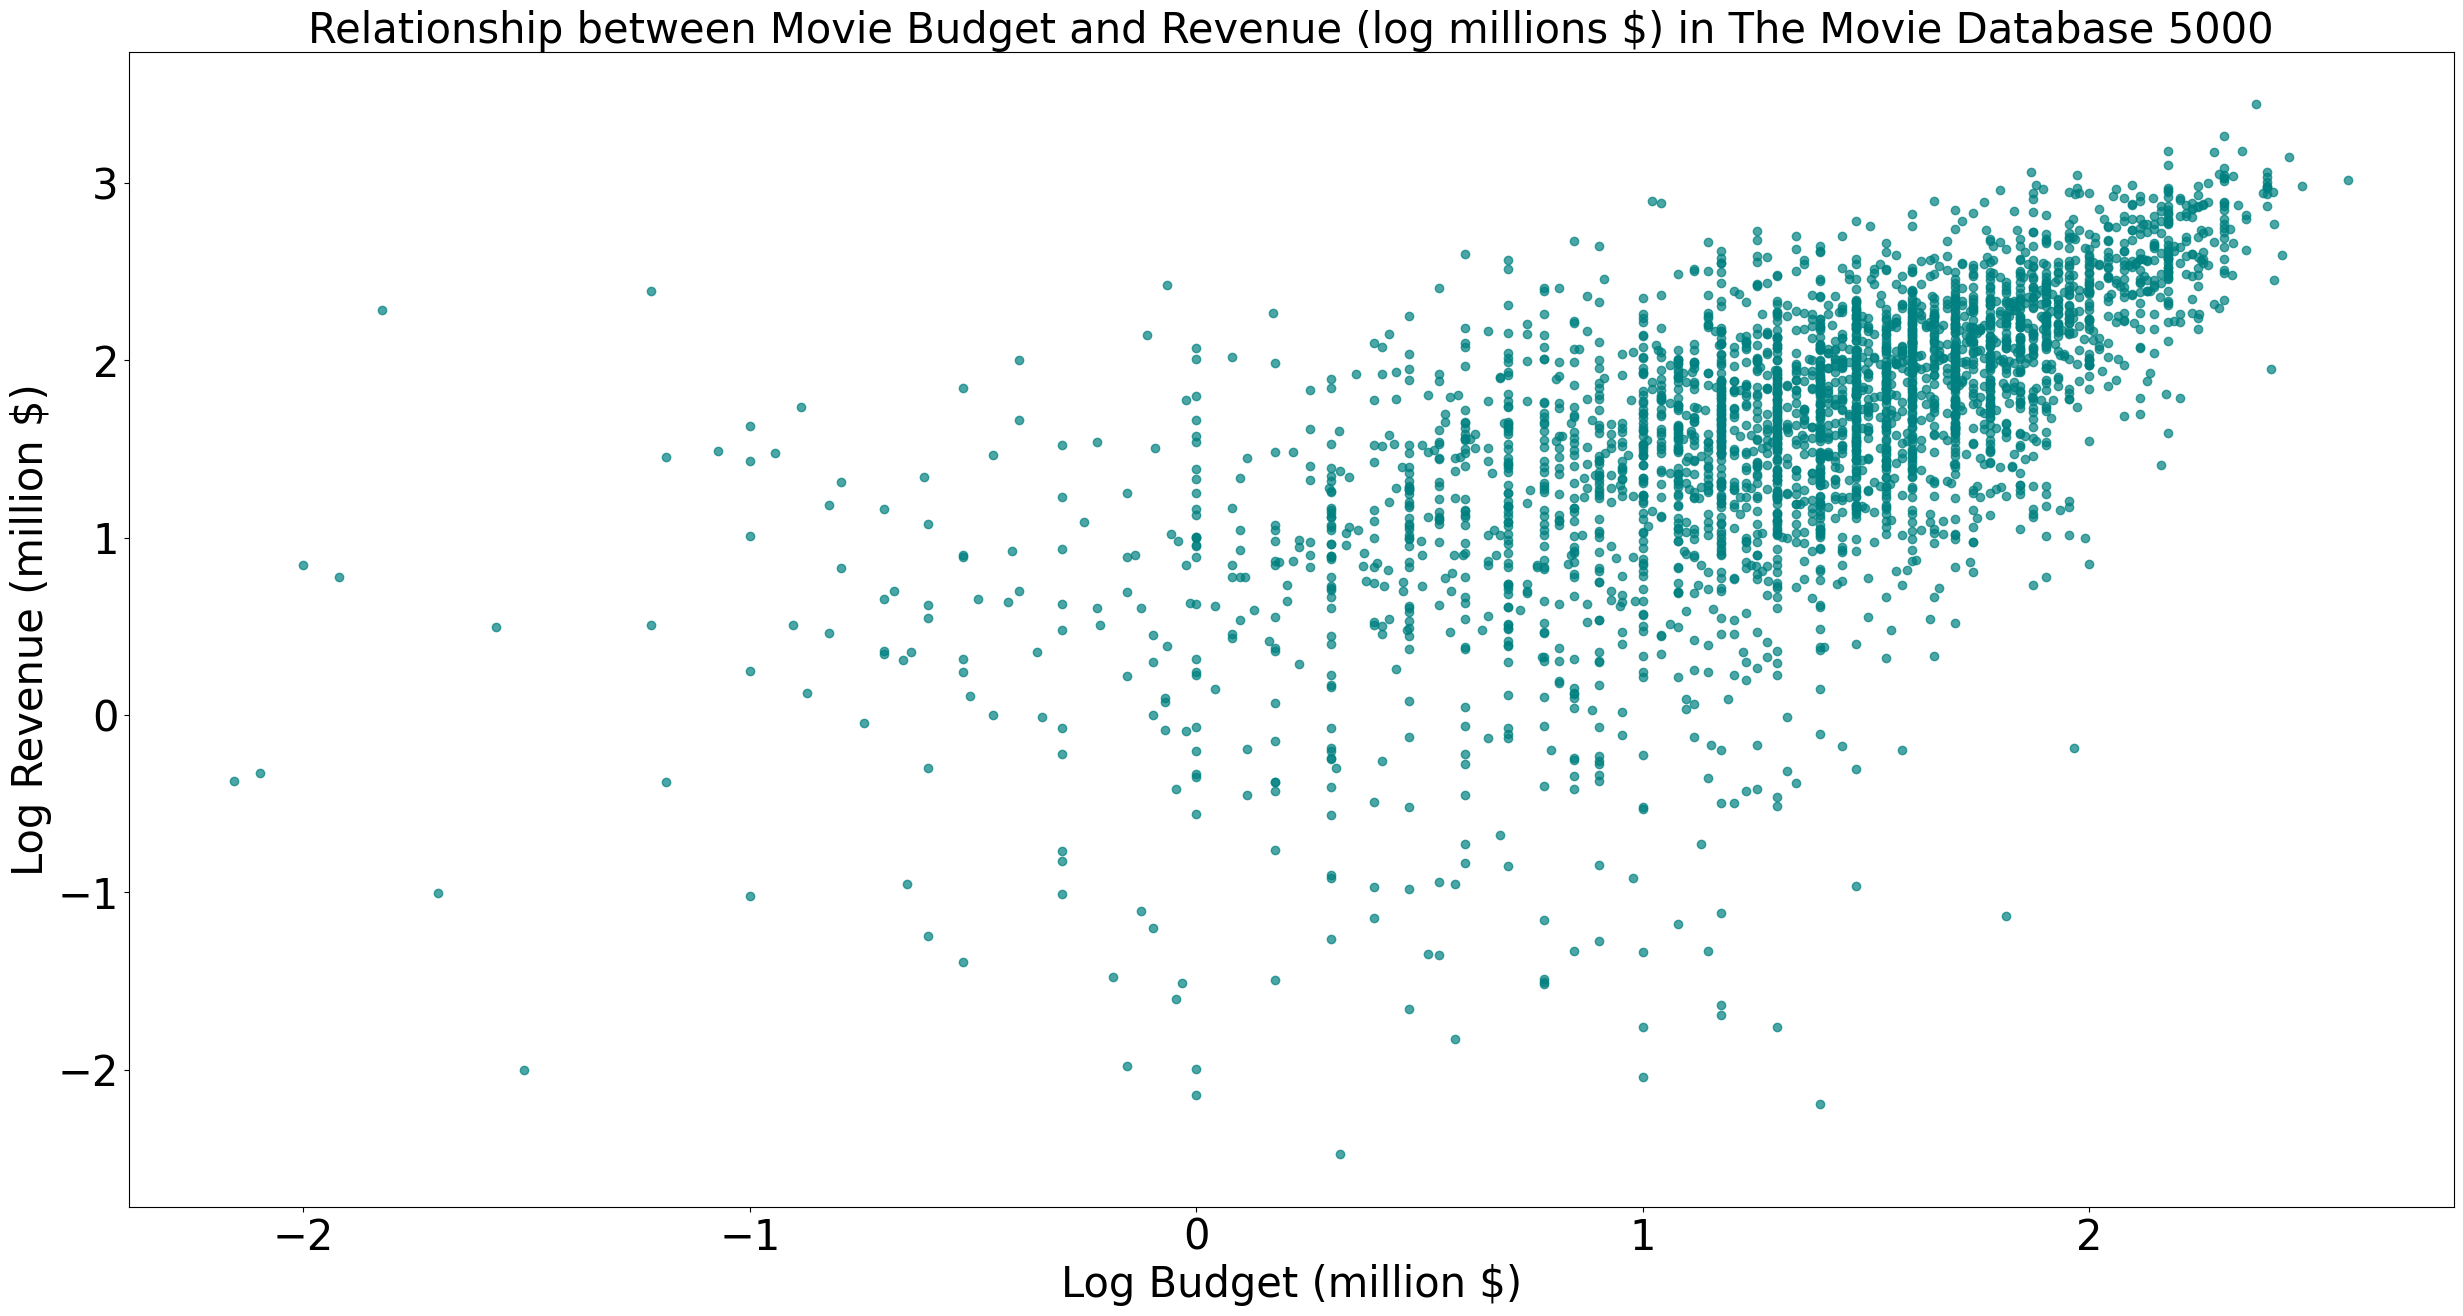

In [228]:
plt.figure(figsize=(30, 15))
log_budget = np.log10(tmdb_5000['budget'])
log_revenue = np.log10(tmdb_5000['revenue'])  

plt.scatter(log_budget, log_revenue, alpha=0.7, color='teal')
plt.title('Relationship between Movie Budget and Revenue (log millions $) in The Movie Database 5000', fontsize=30)
plt.xlabel('Log Budget (million $)', fontsize=30)
plt.ylabel('Log Revenue (million $)', fontsize=30)

plt.xticks(fontsize=30)  
plt.yticks(fontsize=30)

plt.show()

**Release Date Variable:**

1 - Release Years Bar Plot

In [ ]:
tmdb_5000['release_year'] = tmdb_5000['release_date'].dt.year
release_counts = tmdb_5000['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
release_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year in TMDb 5000 (1916 - 2016)')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

years = release_counts.index
rounded_ticks = [round(year) for year in years[::5]]
plt.xticks(range(0, len(years), 5), rounded_ticks, rotation=45, fontsize=12)

plt.show()

2 - Release Month Bar Plot

In [ ]:
tmdb_5000['release_month'] = tmdb_5000['release_date'].dt.month
release_counts = tmdb_5000['release_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
release_counts.plot(kind='bar', color='skyblue')

month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(range(0, 12), month_names, rotation=45)

plt.title('Number of Movies Released per Month in TMDb 5000 (1916 - 2016)')
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

3 - Release months with the highest revenue (conresponding films)

In [231]:
tmdb_5000['release_date'] = pd.to_datetime(tmdb_5000['release_date'])
tmdb_5000['release_month'] = tmdb_5000['release_date'].dt.month

highest_revenue_by_month = tmdb_5000.groupby('release_month').apply(lambda group: group.loc[group['revenue'].idxmax()])

print(highest_revenue_by_month[['release_month', 'original_title', 'revenue']])

               release_month                               original_title  \
release_month                                                               
1                          1                              Kung Fu Panda 3   
2                          2                                     Deadpool   
3                          3                          Alice in Wonderland   
4                          4                                 The Avengers   
5                          5  Pirates of the Caribbean: On Stranger Tides   
6                          6                               Jurassic World   
7                          7                        The Dark Knight Rises   
8                          8                                Suicide Squad   
9                          9                                      Gravity   
10                        10                                      Skyfall   
11                        11                                      Titanic   

**Runtime Variable:**

1 - Box Plot

In [ ]:
Q1 = tmdb_5000['runtime'].quantile(0.25)
Q3 = tmdb_5000['runtime'].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(6, 9))
boxplot = sns.boxplot(y=tmdb_5000['runtime'], color='blue', width=0.4, linewidth=1, boxprops=dict(alpha=0.7), flierprops=dict(marker='D', markerfacecolor='0.3'))

plt.axhline(y=tmdb_5000['runtime'].mean(), color='blue', alpha=0.5, linestyle='--', linewidth=1, label='Mean')

plt.text(0.30, Q1, f'Q1: {Q1:.2f}', va='center', ha='left', color='black')
plt.text(0.30, Q3, f'Q3: {Q3:.2f}', va='center', ha='left', color='black')
plt.text(0.30, Q1 + 0.5 * IQR, f'IQR: {IQR:.2f}', va='center', ha='left', color='black')
plt.legend()

plt.title('Box Plot of Film Runtimes (min)')
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Runtime (min)', fontsize=12)

plt.show()

**Genre Variable:**

1 - Movie count per Genres

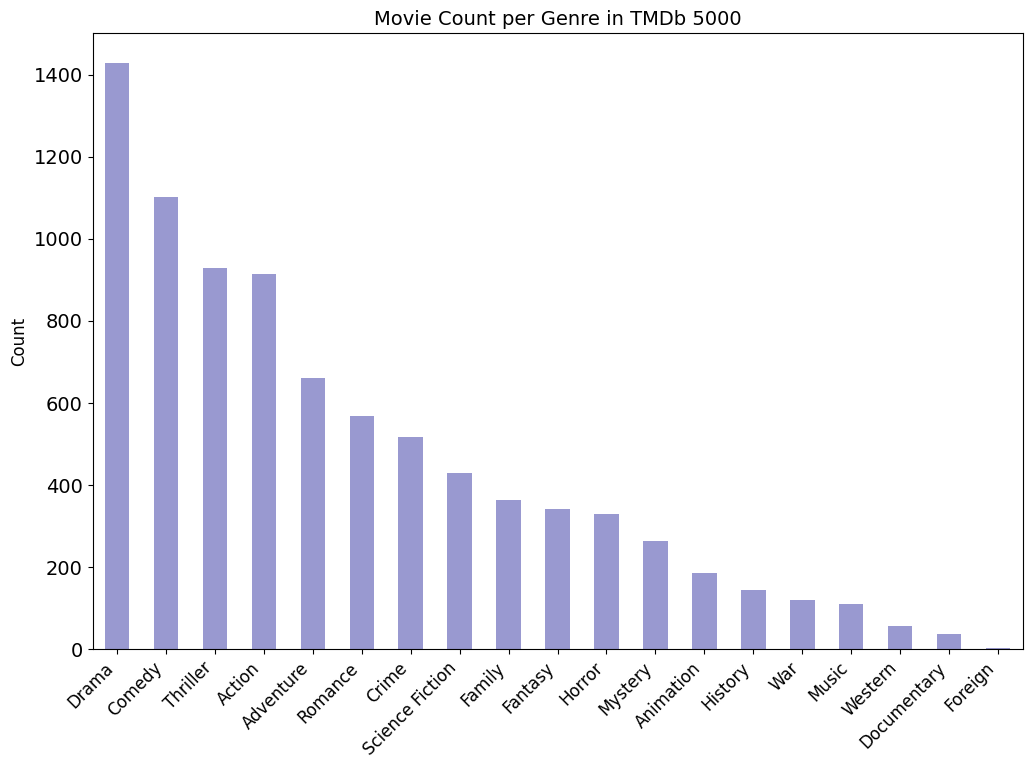

In [133]:
import json
import ast

tmdb_5000['genres'] = tmdb_5000['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
tmdb_5000["genre_names"] = tmdb_5000["genres"].apply(lambda genres: [genre["name"] for genre in genres] if genres else [])

genre_counts = tmdb_5000["genre_names"].explode().value_counts()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind="bar", color='darkblue', alpha=0.4)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)
plt.title('Movie Count per Genre in TMDb 5000', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=14)

plt.show()

In [138]:
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

Drama: 1429
Comedy: 1101
Thriller: 929
Action: 915
Adventure: 660
Romance: 569
Crime: 518
Science Fiction: 430
Family: 364
Fantasy: 341
Horror: 329
Mystery: 264
Animation: 186
History: 144
War: 119
Music: 111
Western: 57
Documentary: 37
Foreign: 4


2 - Average Movie Revenue per Genre

In [27]:
tmdb_5000['genres'] = tmdb_5000['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

tmdb_5000['first_genre'] = tmdb_5000['genres'].apply(lambda x: x[0]['name'] if x and isinstance(x, list) and x[0] else None)

if 'genres' in tmdb_5000:
    tmdb_5000 = tmdb_5000.drop('genres', axis=1)

In [28]:
genres_expanded = tmdb_5000['first_genre'].explode()

df_genres_revenue = pd.DataFrame({'first_genre': genres_expanded, 'revenue': tmdb_5000['revenue']})

average_revenue_by_genre = df_genres_revenue.groupby('first_genre')['revenue'].mean().reset_index()

print(average_revenue_by_genre)

        first_genre      revenue
0            Action 155542666.99
1         Adventure 246941867.96
2         Animation 298941629.18
3            Comedy  84185902.74
4             Crime  67198038.68
5       Documentary  24582452.97
6             Drama  73000347.15
7            Family 234061585.68
8           Fantasy 185404327.73
9           Foreign    111300.00
10          History 100777495.28
11           Horror  67561709.83
12            Music  48582505.85
13          Mystery 102283092.19
14          Romance 100361886.96
15  Science Fiction 204763413.96
16         Thriller 100750394.81
17              War  84900524.44
18          Western  60836316.50


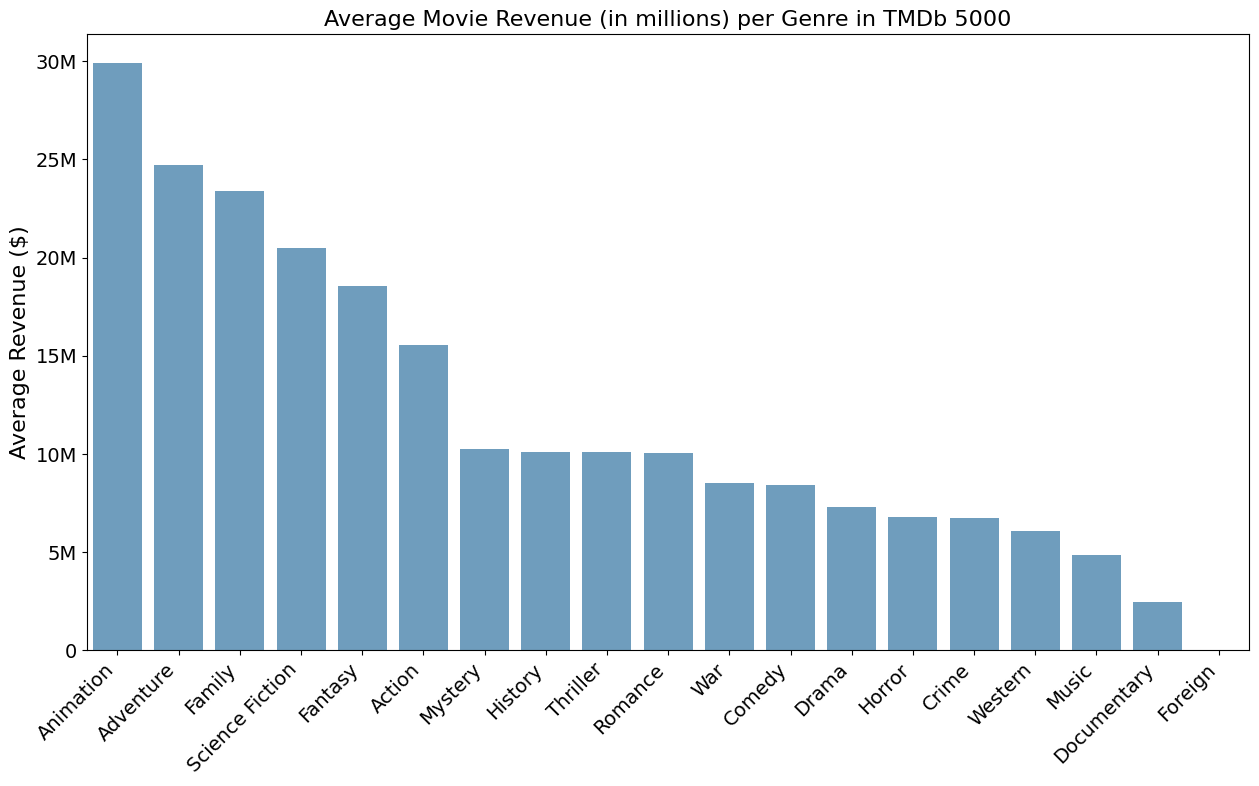

In [131]:
plt.figure(figsize=(15, 8))

sns.barplot(x='first_genre', y='revenue', data=average_revenue_by_genre, alpha=0.7, order=average_revenue_by_genre.sort_values('revenue', ascending=False)['first_genre'])

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks([0, 5e7, 10e7, 15e7, 20e7, 25e7, 30e7], ['0', '5M', '10M', '15M', '20M', '25M', '30M'], fontsize=14)

plt.title('Average Movie Revenue (in millions) per Genre in TMDb 5000', fontsize=16)
plt.xlabel('')
plt.ylabel('Average Revenue ($)', fontsize=16)

plt.show()

In [30]:
foreign_genre_data = average_revenue_by_genre[average_revenue_by_genre['first_genre'] == 'Foreign']

average_revenue_foreign = foreign_genre_data['revenue'].values[0]
print(f"Average movie revenue for 'Foreign' first_genre: ${average_revenue_foreign:.2f}")

Average movie revenue for 'Foreign' first_genre: $111300.00


**Production Companies:**

1 - Top Production Companies

In [31]:
tmdb_5000['production_companies'] = tmdb_5000['production_companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_production_counts = pd.DataFrame({'production_company': tmdb_5000['production_companies']})

# Drop rows with null values but run notebook without this code when running other visualisations
df_production_counts = df_production_counts.dropna()

production_counts = df_production_counts['production_company'].explode().value_counts().reset_index()
production_counts.columns = ['production_company', 'count']

In [80]:
top_ten_production = production_counts.head(10).copy()
top_ten_production['production_company'] = top_ten_production['production_company'].apply(lambda x: x[0]['name'] if isinstance(x, list) and x else x)

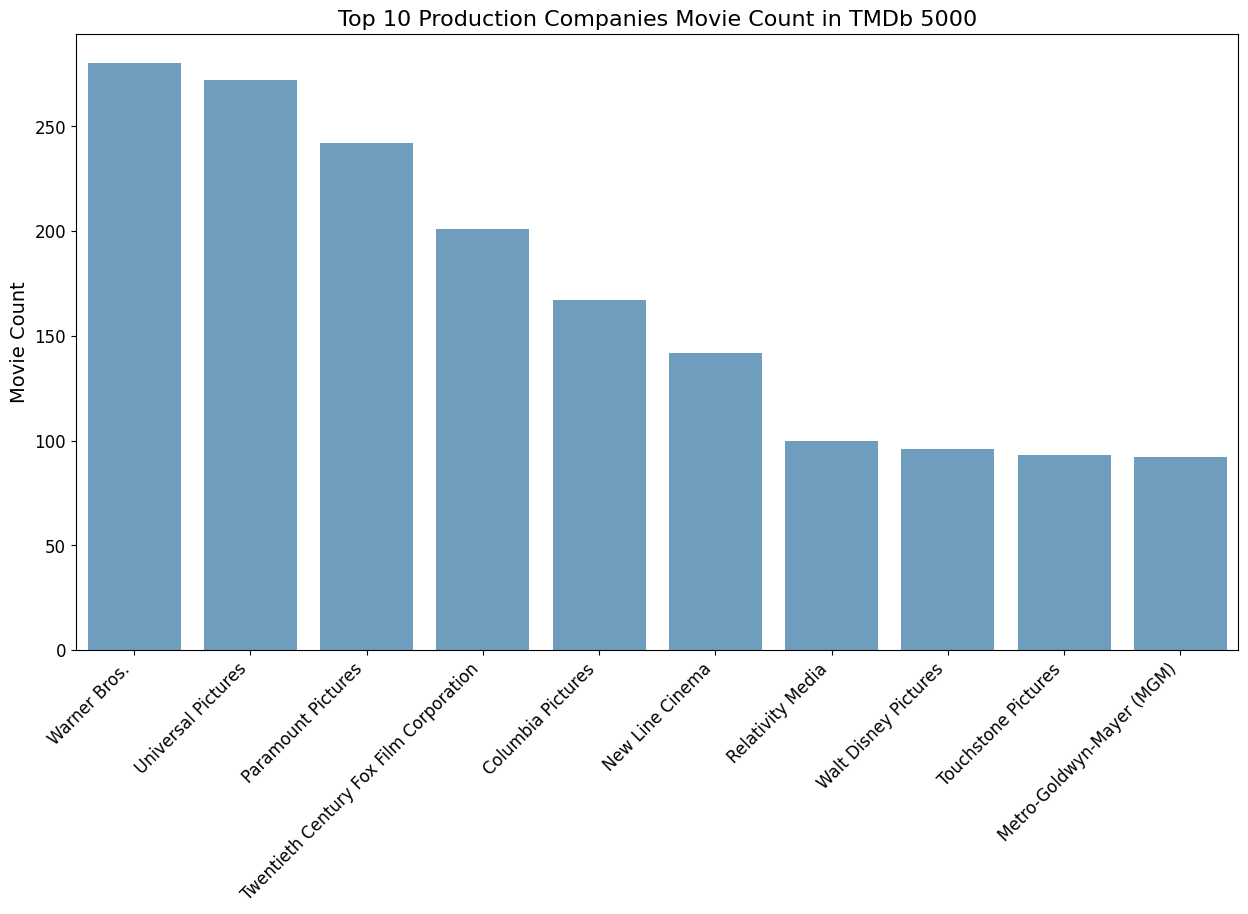

In [82]:
# since 'production_company' column actually contains lists of dictionaries:
top_ten_production['production_company'] = top_ten_production['production_company'].apply(lambda x: x['name'] if isinstance(x, dict) else x)

plt.figure(figsize=(15, 8))
sns.barplot(x='production_company', y='count', data=top_ten_production, alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 10 Production Companies Movie Count in TMDb 5000', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Movie Count', fontsize=14)
plt.show()

2 - Average Movie Revenue in Top 10 Production Companies

In [35]:
tmdb_5000['production_companies'] = tmdb_5000['production_companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

tmdb_5000['first_production_company'] = tmdb_5000['production_companies'].apply(lambda x: x[0]['name'] if x and isinstance(x, list) and x[0] else None)
tmdb_5000 = tmdb_5000[(tmdb_5000['first_production_company'] != 0.00) & (tmdb_5000['revenue'] != 0.00)]

df_production_revenue = pd.DataFrame({'production_company': tmdb_5000['first_production_company'], 'revenue': tmdb_5000['revenue']})

average_revenue_by_production_company = df_production_revenue.groupby('production_company')['revenue'].mean().reset_index()

print(average_revenue_by_production_company)

                                    production_company      revenue
0                                            100 Bares  28982921.50
1                                        1492 Pictures 704386834.25
2                                                 1818  12232628.00
3                                     19 Entertainment   4922166.00
4                                21 Laps Entertainment   6854611.00
5                                             26 Films  47175038.00
6                                     2929 Productions  23014227.25
7                                 3 Arts Entertainment   3566225.00
8                                         360 Pictures   7000000.00
9                                     3D Entertainment   7518876.00
10                                 3Mark Entertainment   4720371.00
11                         40 Acres & A Mule Filmworks  18589203.50
12                                        A Band Apart  25836616.00
13                                       A Bigge

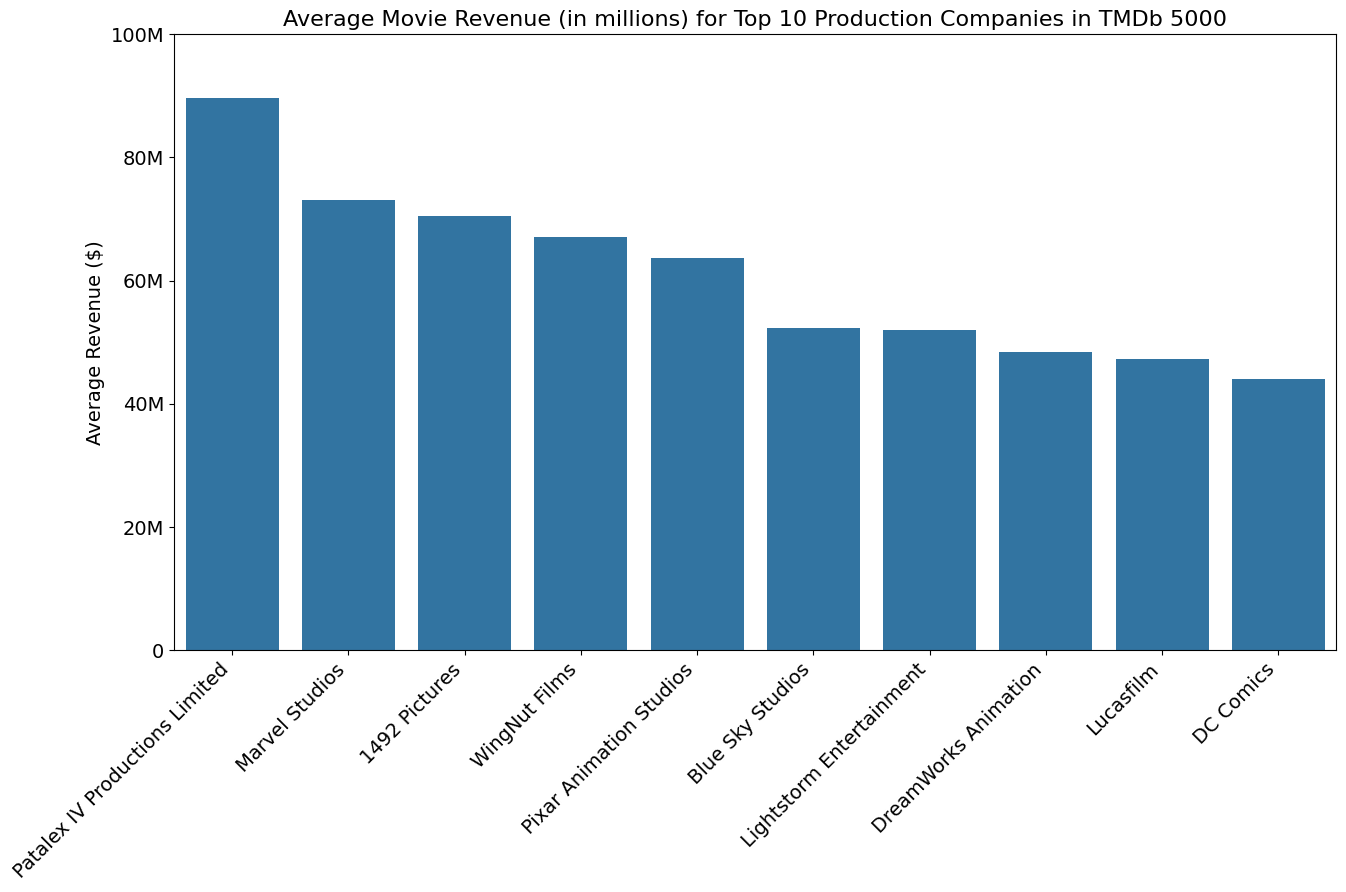

In [139]:
top_production_companies = average_revenue_by_production_company.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x='production_company', y='revenue', data=top_production_companies)

plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks([0, 20e7, 40e7, 60e7, 80e7, 100e7], ['0', '20M', '40M', '60M', '80M', '100M'], fontsize=14)

plt.title('Average Movie Revenue (in millions) for Top 10 Production Companies in TMDb 5000', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Average Revenue ($)', fontsize=14)

plt.show()

**Title and Overview:**

In [149]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [146]:
tmdb_5000['title'] = tmdb_5000['title'].astype('str')
tmdb_5000['overview'] = tmdb_5000['overview'].astype('str')

In [147]:
title_corpus = ' '.join(tmdb_5000['title'])
overview_corpus = ' '.join(tmdb_5000['overview'])

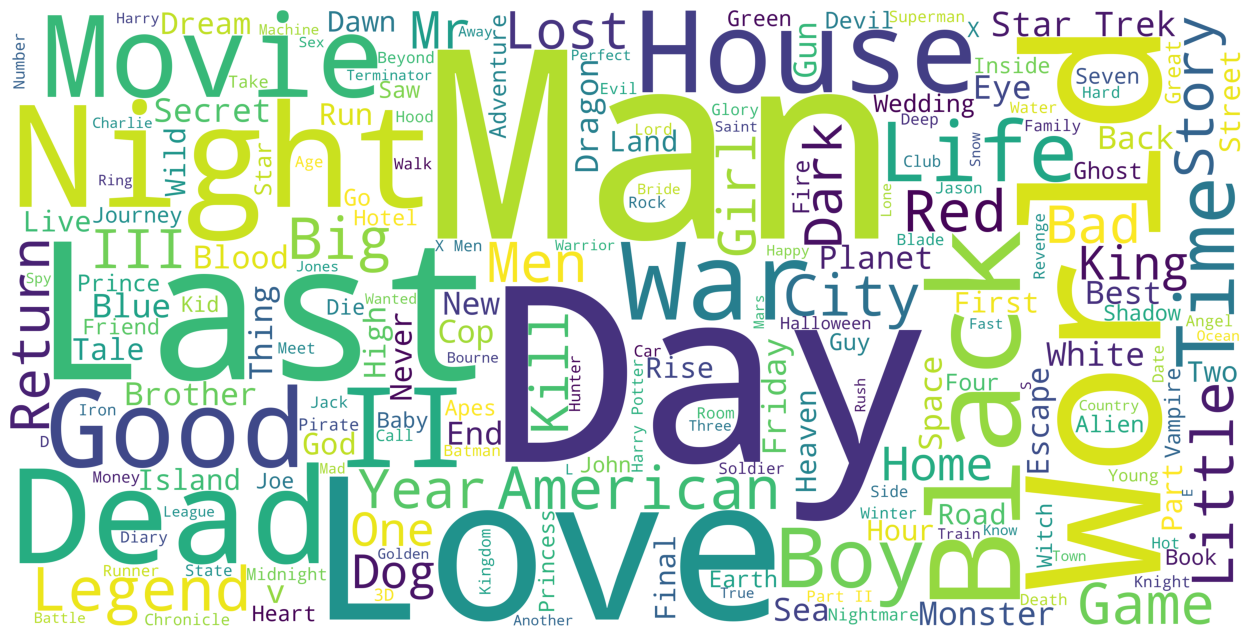

In [150]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

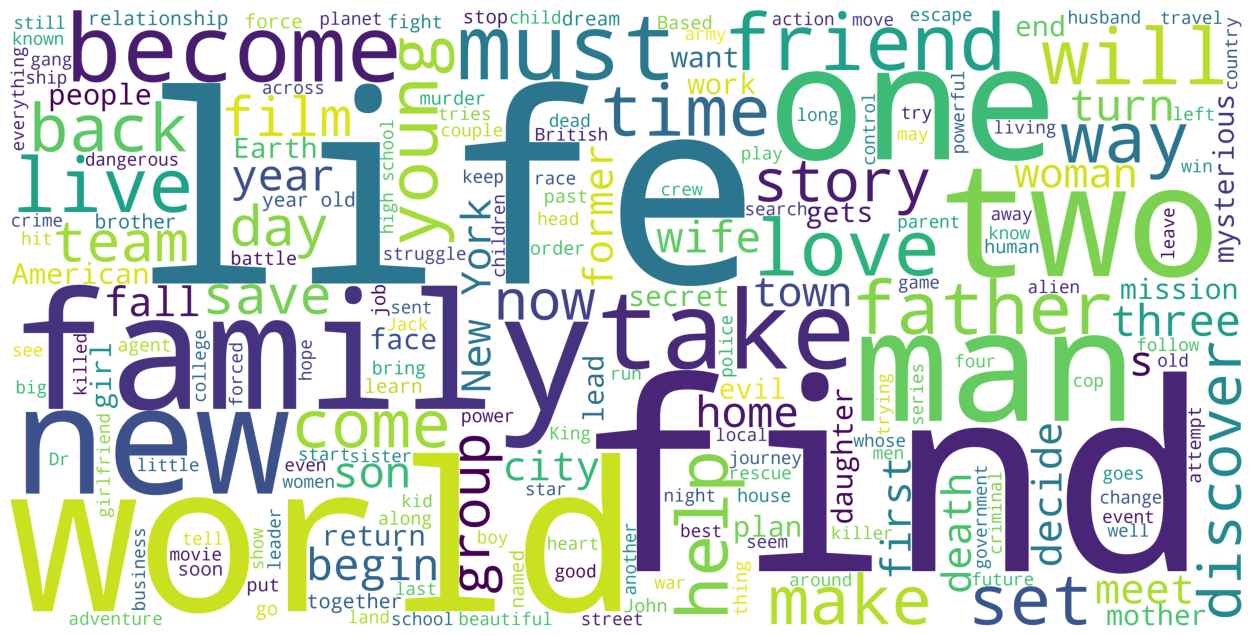

In [152]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Top 10 Movies with best Vote Average:**

In [225]:
# Exclude rows 2947 and 2970 as they had a respective vote count of 2 and 12 but take code out when running other analysis
rows_to_exclude = [2947, 2970]
tmdb_5000 = tmdb_5000[~tmdb_5000.index.isin(rows_to_exclude)]

top_20_movies = tmdb_5000.sort_values(by='vote_average', ascending=False).head(20)
top_20_movies_info = top_20_movies[['title', 'vote_average']]
print(top_20_movies_info)

                                title  vote_average
1881         The Shawshank Redemption          8.50
3337                    The Godfather          8.40
1818                 Schindler's List          8.30
3232                     Pulp Fiction          8.30
2731           The Godfather: Part II          8.30
3865                         Whiplash          8.30
662                        Fight Club          8.30
2294                    Spirited Away          8.30
3719  One Flew Over the Cuckoo's Nest          8.20
809                      Forrest Gump          8.20
1847                       GoodFellas          8.20
4602                     12 Angry Men          8.20
4535                    Seven Samurai          8.20
1987             Howl's Moving Castle          8.20
1990          The Empire Strikes Back          8.20
65                    The Dark Knight          8.20
2247                Princess Mononoke          8.20
690                    The Green Mile          8.20
2170        

In [127]:
print(tmdb_5000[tmdb_5000['original_title'] == 'The Godfather'])

         budget                                             genres  \
3337 6000000.00  [{"id": 18, "name": "Drama"}, {"id": 80, "name...   

                                               keywords original_language  \
3337  [{"id": 131, "name": "italy"}, {"id": 699, "na...                en   

     original_title                                           overview  \
3337  The Godfather  Spanning the years 1945 to 1955, a chronicle o...   

                                   production_companies  \
3337  [{"name": "Paramount Pictures", "id": 4}, {"na...   

                                   production_countries  \
3337  [{"iso_3166_1": "US", "name": "United States o...   

                                       spoken_languages  \
3337  [{"iso_639_1": "en", "name": "English"}, {"iso...   

                         tagline          title      revenue  runtime  \
3337  An offer you can't refuse.  The Godfather 245066411.00   175.00   

      vote_average  vote_count  popularity release_

In [128]:
print(tmdb_5000[tmdb_5000['original_title'] == 'The Shawshank Redemption'])

          budget                                             genres  \
1881 25000000.00  [{"id": 18, "name": "Drama"}, {"id": 80, "name...   

                                               keywords original_language  \
1881  [{"id": 378, "name": "prison"}, {"id": 417, "n...                en   

                original_title  \
1881  The Shawshank Redemption   

                                               overview  \
1881  Framed in the 1940s for the double murder of h...   

                                   production_companies  \
1881  [{"name": "Castle Rock Entertainment", "id": 97}]   

                                   production_countries  \
1881  [{"iso_3166_1": "US", "name": "United States o...   

                              spoken_languages  \
1881  [{"iso_639_1": "en", "name": "English"}]   

                                                tagline  \
1881  Fear can hold you prisoner. Hope can set you f...   

                         title     revenue  runtime  vot

In [129]:
selected_row = tmdb_5000[tmdb_5000['original_title'] == "Schindler's List"]
selected_row

,budget,genres,keywords,original_language,original_title,overview,production_companies,production_countries,spoken_languages,tagline,title,revenue,runtime,vote_average,vote_count,popularity,release_date
1818,22000000.00,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 1382, ""name"": ""factory""}, {""id"": 1631,...",en,Schindler's List,The true story of how businessman Oskar Schind...,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...","Whoever saves one life, saves the world entire.",Schindler's List,321365567.00,195.00,8.30,4329.00,104.47,1993-11-29


**Vote Count vs Vote Average Scatter Plot** 

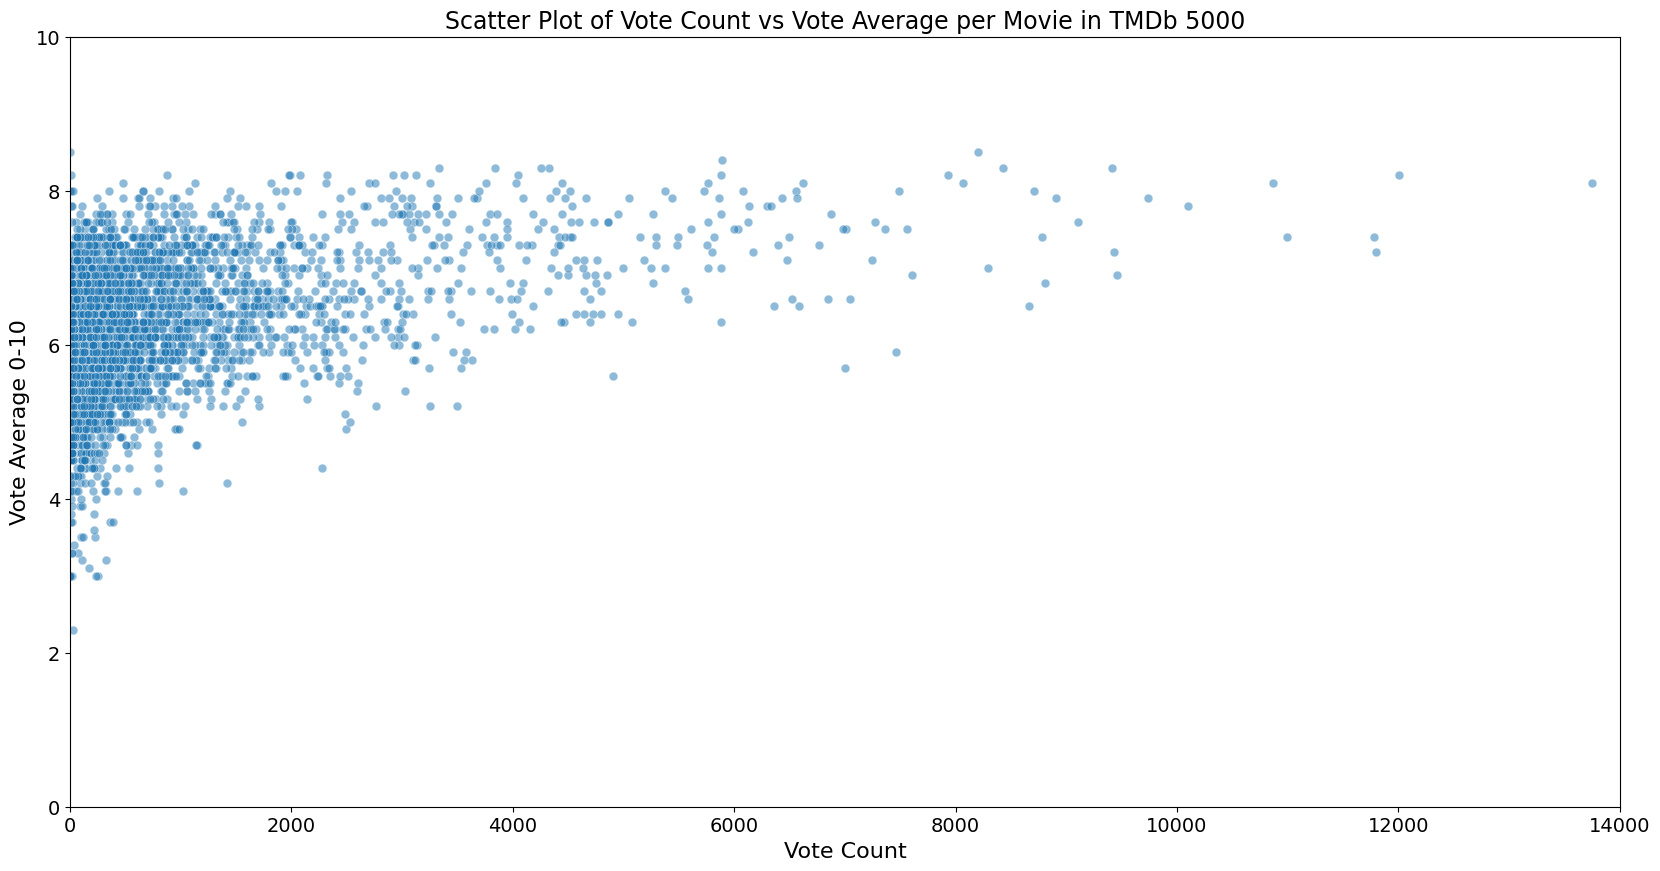

In [37]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='vote_count', y='vote_average', data=tmdb_5000, s=40, alpha=0.5)
plt.title('Scatter Plot of Vote Count vs Vote Average per Movie in TMDb 5000', fontsize=17)
plt.xlabel('Vote Count', fontsize=16)
plt.ylabel('Vote Average 0-10', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0, 10)
plt.xlim(0, 14000)

plt.show()

In [112]:
from scipy.stats import mode
print(tmdb_5000['vote_average'].mode())

0   6.50
Name: vote_average, dtype: float64


In [113]:
print(tmdb_5000['vote_count'].mode())

0   210.00
Name: vote_count, dtype: float64


**Runtime Box Plot:**

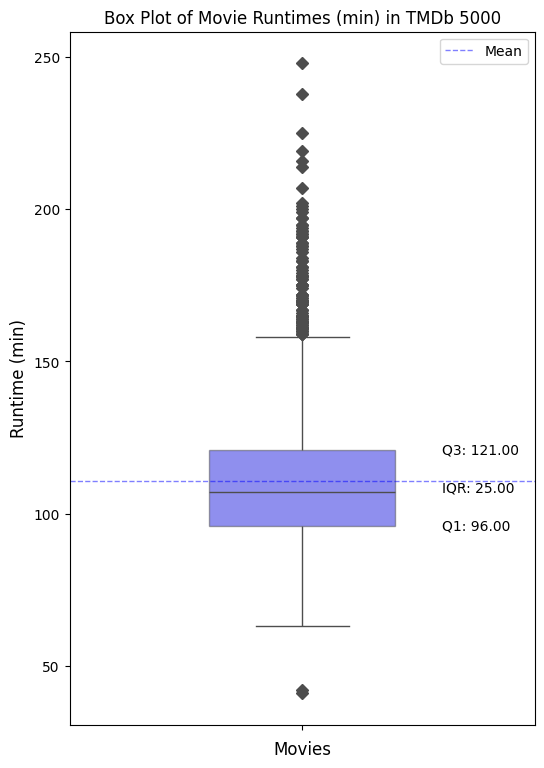

In [84]:
Q1 = tmdb_5000['runtime'].quantile(0.25)
Q3 = tmdb_5000['runtime'].quantile(0.75)
IQR = Q3 - Q1
 
plt.figure(figsize=(6, 9))
boxplot = sns.boxplot(y=tmdb_5000['runtime'], color='blue', width=0.4, linewidth=1, boxprops=dict(alpha=0.5), flierprops=dict(marker='D', markerfacecolor='0.3'))

plt.axhline(y=tmdb_5000['runtime'].mean(), color='blue', alpha=0.5, linestyle='--', linewidth=1, label='Mean')
plt.text(0.30, Q1, f'Q1: {Q1:.2f}', va='center', ha='left', color='black')
plt.text(0.30, Q3, f'Q3: {Q3:.2f}', va='center', ha='left', color='black')
plt.text(0.30, Q1 + 0.5 * IQR, f'IQR: {IQR:.2f}', va='center', ha='left', color='black')

plt.legend()

plt.title('Box Plot of Movie Runtimes (min) in TMDb 5000')
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Runtime (min)', fontsize=12)

plt.show()

In [85]:
print(tmdb_5000['runtime'].mean())

110.72443890274315


In [95]:
print(tmdb_5000['runtime'].max())

248.0


In [96]:
print(tmdb_5000[tmdb_5000['runtime'] == 248.0])

          budget                                           keywords  \
1125 31115000.00  [{"id": 5049, "name": "ancient rome"}, {"id": ...   

     original_language original_title  \
1125                en      Cleopatra   

                                               overview  \
1125  Historical epic. The triumphs and tragedy of t...   

                                   production_companies  \
1125  [{'name': 'Twentieth Century Fox Film Corporat...   

                                   production_countries  \
1125  [{"iso_3166_1": "GB", "name": "United Kingdom"...   

                                       spoken_languages  \
1125  [{"iso_639_1": "en", "name": "English"}, {"iso...   

                                                tagline      title  \
1125  The motion picture the world has been waiting ...  Cleopatra   

         revenue  runtime  vote_average  vote_count  popularity release_date  \
1125 71000000.00   248.00          6.70      146.00       13.24   1963-06-12 

In [229]:
highest_revenue_movie = tmdb_5000.loc[tmdb_5000['revenue'].idxmax()]

# Print the runtime of the movie with the highest revenue
print(f"The movie with the highest revenue is '{highest_revenue_movie['original_title']}' "
      f"and it has a runtime of {highest_revenue_movie['runtime']} minutes.")

The movie with the highest revenue is 'Avatar' and it has a runtime of 162.0 minutes.


**Production Country:**

In [173]:
!pip install plotly

In [186]:
import plotly.graph_objs as go
import plotly.express as px

In [187]:
import ast

# Convert only non-list entries using ast.literal_eval
tmdb_5000['production_countries'] = tmdb_5000['production_countries'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Extract country names from the list, if present
tmdb_5000['production_countries'] = tmdb_5000['production_countries'].apply(
    lambda x: [i['name'] if isinstance(i, dict) else i for i in x] if isinstance(x, list) and x else x
)

In [188]:
s = tmdb_5000.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [189]:
con_df = tmdb_5000.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index(drop=True)
con_df.head(10)

,num_movies,country
0,2895,United States of America
1,431,United Kingdom
2,231,Germany
3,195,France
4,161,Canada
5,77,Australia
6,48,Italy
7,43,Spain
8,40,Japan
9,37,China


In [194]:
con_df = con_df[con_df['country'] != 'United States of America']

In [206]:
import plotly.graph_objs as go
import plotly.express as px

# Your data processing code here...

fig = px.choropleth(
    tmdb_5000,
    locations=con_df['country'],
    locationmode='country names',
    color=con_df['num_movies'],
    title='Movies released per country (excluding US) in The Movie Database 5000',
    color_continuous_scale='viridis'
)

fig.update_layout(
    width=1000,  
    height=800  
)

fig.show()

In [209]:
pyo.plot(fig, filename='interactive_plot.html')

'interactive_plot.html'

**Other Varibales Analysed:**

Spoken Language:

In [38]:
#spoken language
tmdb_5000['spoken_languages'].describe()


count                                         3210
unique                                         436
top       [{"iso_639_1": "en", "name": "English"}]
freq                                          2121
Name: spoken_languages, dtype: object

Original Language:

In [39]:
#original language
tmdb_5000["original_language"].describe()

count     3210
unique      26
top         en
freq      3085
Name: original_language, dtype: object

Production Countries

In [40]:
#production countries
tmdb_5000['production_countries'].describe()

count                                                  3210
unique                                                  318
top       [{"iso_3166_1": "US", "name": "United States o...
freq                                                   2142
Name: production_countries, dtype: object